## Digit Recognizer

https://www.kaggle.com/competitions/digit-recognizer

In [3]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train = np.loadtxt('data/digit/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('data/digit/test.csv', delimiter=',', skiprows=1)

In [5]:
# Сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обработки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [6]:
train_img.shape

(42000, 28, 28)

## Визуализируем исходные данные

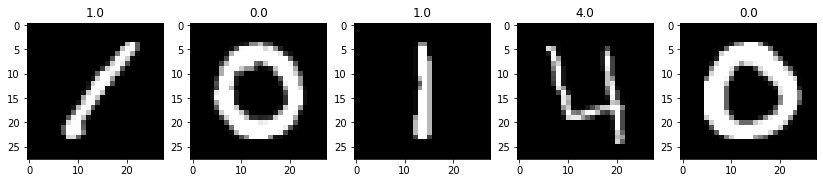

In [10]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

## Вычисляем X и Y составляющие градиента с помощью оператора Собеля

In [11]:
train_sobel_x = np.zeros_like(train_img)
train_sobel_y = np.zeros_like(train_img)
for i in range(len(train_img)):
    train_sobel_x[i] = cv2.Sobel(train_img[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    train_sobel_y[i] = cv2.Sobel(train_img[i], cv2.CV_64F, dx=0, dy=1, ksize=3)

In [12]:
test_sobel_x = np.zeros_like(test_img)
test_sobel_y = np.zeros_like(test_img)
for i in range(len(test_img)):
    test_sobel_x[i] = cv2.Sobel(test_img[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    test_sobel_y[i] = cv2.Sobel(test_img[i], cv2.CV_64F, dx=0, dy=1, ksize=3)


## Вычисляем угол и длину вектора градиента

In [13]:
train_g, train_theta = cv2.cartToPolar(train_sobel_x, train_sobel_y)

In [14]:
test_g, test_theta = cv2.cartToPolar(test_sobel_x, test_sobel_y)

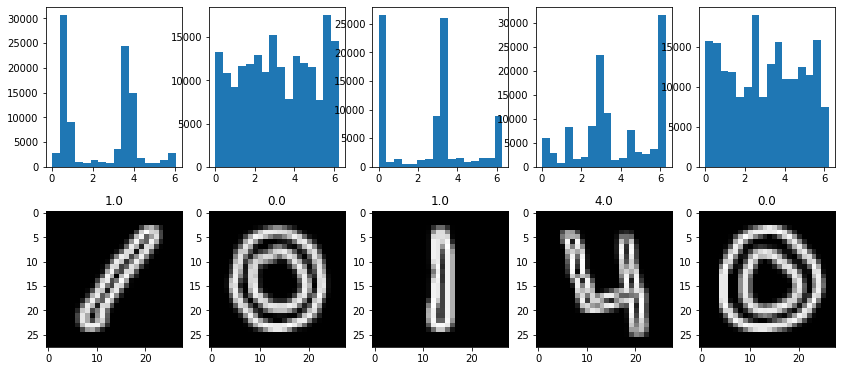

In [16]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_g[:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);
    subplot = fig.add_subplot(3, 7, i)
    plt.hist(train_theta[i - 1].flatten(), bins=16, weights=train_g[i - 1].flatten())

## Готовим файл для отправки

In [1]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId, Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%s\n' % (i, p))

NameError: name 'pred_test' is not defined